In [1]:
import numpy as np

v = np.linspace(-150, 0, 1000)

#nat
nat_minf  = 1 / ( 1 + np.exp( ( - v - 35.5) / 7.2 ) )
nat_hinf  = 1 / ( 1 + np.exp( ( v + 40 ) / 4 ) )

#nap
nap_vhalf = -48
nap_k = 5
nap_minf = 1 / ( 1 + np.exp( ( nap_vhalf - v ) / nap_k ) )

#kdr
kdr_vhalfn = 0
kdr_ninf = 1 / ( 1 + np.exp( ( kdr_vhalfn - v ) / 11 ) )

#im
im_inf = 1 / ( 1 + np.exp( ( - v - 35 ) / 10.34 ) ) 


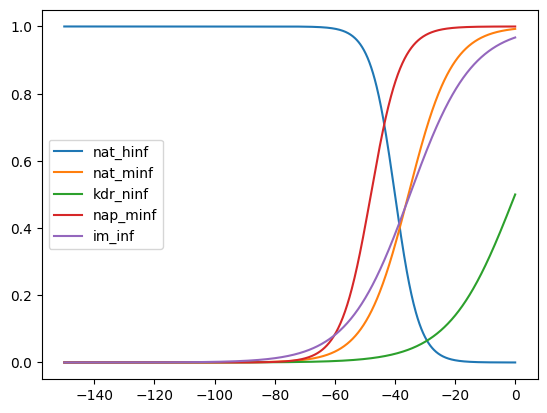

In [2]:
import matplotlib.pyplot as plt

plt.plot(v, nat_hinf, label = 'nat_hinf')
plt.plot(v, nat_minf, label = 'nat_minf')
plt.plot(v, kdr_ninf, label = 'kdr_ninf')
plt.plot(v, nap_minf, label = 'nap_minf')
plt.plot(v, im_inf, label = 'im_inf')
plt.legend()

In [3]:
import os
os.system('nrnivmodl')

/home/mwsrgf/proj/ACT/data/TODO/CA3_nosyn/orig
Mod files: "./Gfluct_new_exc.mod" "./Gfluct_new_inh.mod" "./imCA3.mod" "./kdrCA3.mod" "./leakCA3.mod" "./napCA3.mod" "./natCA3.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


/home/mwsrgf/act-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


0

In [ ]:


from neuron import h

h.load_file('stdrun.hoc')

h.load_file("template.hoc")
cell_orig = h.CA3PyramidalCell_orig()

# CI
ci_orig = h.IClamp(cell_orig.soma[0](0.5))
ci_orig.amp = 0.1 # (nA)
ci_orig.delay = 50
ci_orig.dur = 150

# V recording
v_orig = h.Vector().record(cell_orig.soma[0](0.5)._ref_v)

# Run the simulation
h.tstop = 200
h.dt = 0.01
h.steps_per_ms = 1 / h.dt
h.v_init = -70

h.run()

import numpy as np
np.save('orig.npy', v_orig.as_numpy())

--No graphics will be displayed.


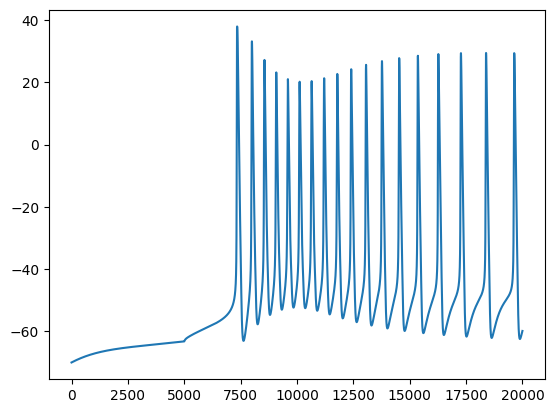

In [5]:
import matplotlib.pyplot as plt

plt.plot(v_orig, label = 'orig')